# Assignment 6: Lighting Estimation

MIDS W281: Computer Vision

## Recommended Libraries

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

![Hybrid Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_6/sphere.png)

 ### Overview
Lighting estimation is critical for many computer vision applications, and demonstrates a common use of least squares operations on pixel values. Accurate estimation of the lighting environment under which an image was captured can be used for image forensics, image re-lighting, 3D surface modeling, and compositing images with rendered objects, and many other techniques. For this assignment we will compute the lighting direction for a simple toy problem consisting of a sphere with faceted edges.

Consider the illuminated sphere shown above. If, as in this case, the light illuminating the sphere is distant and the sphere is a Lambertian surface, the amount of light $I$ that strikes any point ($X,Y,Z$) on the sphere's surface is equal to the dot product between the 3-D surface normal $N$ at ($X,Y,Z$) and the single 3-D vector $L$ which specifies the direction to the light source. In this assignment, you will estimate the direction to the light $L$ using least squares. You can assume that there is only one light source in the scene and there is no ambient light.

### Description

1. Write a Python code to load the given 3-D [$X$-](X.npy), [$Y$-](Y.npy), and [$Z$-](Z.npy) coordinates of the sphere and the corresponding illumination [$I$](I.npy). After loading the files you will have four 41 x 41 matrices corresponding to the illumination $I$ and the $X$-, $Y$-, and $Z$- coordinates of the sphere. That is, for any $u$ and $v$ between 1 and 41, the illumination on the sphere's surface at ($X_{u,v},Y_{u,v},Z_{u,v}$) is $I_{u,v}$. Display this sphere using the `plot_surface` method in Python. Set the color values so that the displayed sphere looks like the above image without the $L$ and $N$ arrows.  
&nbsp;

2. For each ($X,Y,Z$) on the sphere's surface, determine the surface normal $N$. The surface normal at any point on the sphere is a vector from the sphere origin to the point. Since the sphere is centered at the origin, this is a simple calculation. The surface normal should be specified as a unit vector.  
&nbsp;  

3. Using least-squares, estimate the lighting (a 3-D vector). Your solution should create an over constrained system of linear equations in the surface normal and illumination at each point ($X,Y,Z$) on the sphere's surface that is not in shadow (i.e. intensity is greater than zero). Your solution for the light vector $L$ is determined by solving this system of linear equations using least-squares.   
&nbsp;

**Do not use pseudo inverse functions like `numpy.linalg.pinv` or least squares functions `numpy.linalg.lstsq`.**

**You are able to use `numpy.linalg.inv`**

### Deliverables:

- Python code for computing the sphere normals and the light direction
- A plot displaying the 3-D sphere
- The 3-D direction of the light source

#### Create your functions

In [2]:
def plot_save_sphere(X, Y, Z, C, out_file):
    """
    Plots the 3D sphere using the X, Y, Z coordinate arrays and the color array C,
    then saves the plot to the specified out_file.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, facecolors=C, rstride=1, cstride=1)
    ax.set_title('Plot the Sphere')
    plt.tight_layout(pad=5.08)
    plt.savefig(out_file, bbox_inches='tight')
    plt.show()

def compute_normals(X, Y, Z):
    """
    Given the 41x41 arrays for the X, Y, and Z coordinates of a sphere,
    compute and return an (41*41, 3) array of unit normals.
    Since the sphere is centered at the origin, the normal at each point is
    simply the vector from the origin to that point normalized to have unit length.
    """
    # Flatten each coordinate array to a (41*41, ) vector.
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    Z_flat = Z.flatten()

    # Stack to get an array of points of shape (41*41, 3)
    points = np.vstack((X_flat, Y_flat, Z_flat)).T

    # Compute the Euclidean norm of each point (vector from origin)
    norms = np.linalg.norm(points, axis=1)

    # Avoid division by zero (should not occur for a sphere)
    norms[norms == 0] = 1

    # Normalize each vector to obtain unit normals
    N = points / norms[:, np.newaxis]
    return N


#### Run your code

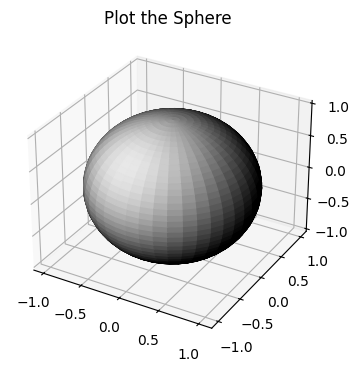

In [3]:
# Load the data from npy files.
X = np.load('X.npy')
Y = np.load('Y.npy')
Z = np.load('Z.npy')
I = np.load('I.npy')

# Create a color array by stacking the illumination values into three channels.
colors = np.concatenate((I[:, :, np.newaxis],
                         I[:, :, np.newaxis],
                         I[:, :, np.newaxis]), axis=2)

# Plot the sphere and save the figure.
plot_save_sphere(X, Y, Z, colors, 'temp.png')

# Compute the surface normals for each point on the sphere.
N = compute_normals(X, Y, Z)

#### Calculate and print the 3D direction of light source

In [4]:
# Vectorize the illumination image.
I_flat = I.flatten()

# Select only those points on the sphere that are not in shadow (intensity > 0).
idx = I_flat > 0
A = N[idx, :]   # Normal vectors corresponding to non-shadowed points.
b = I_flat[idx] # Measured intensities at these points.

# Solve for the light direction L using the normal equations for least squares.
# We want to solve A * L = b. The least squares solution is:
#   L = (A^T A)^{-1} A^T b
L = np.linalg.inv(A.T @ A) @ (A.T @ b)

# Print the estimated 3D light direction.
print("Estimated light direction:", L)

Estimated light direction: [ 0.00596716 -0.70706699  0.70705375]
